In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [9]:
df = pd.read_excel('DJIA.xlsx')[['Date','Close*']].sort_values(by='Date')

In [10]:
df.set_index(keys='Date',inplace=True)
df

,Close*
Date,
1992-11-17,3193.30
1992-11-17,NaN
1992-11-18,3207.40
1992-11-19,3209.50
1992-11-20,3227.40
...,...
2022-10-11,29239.19
2022-10-12,29210.85
2022-10-13,30038.72


In [11]:
df.dropna(inplace = True)

In [12]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Text(0, 0.5, 'Prices ($)')

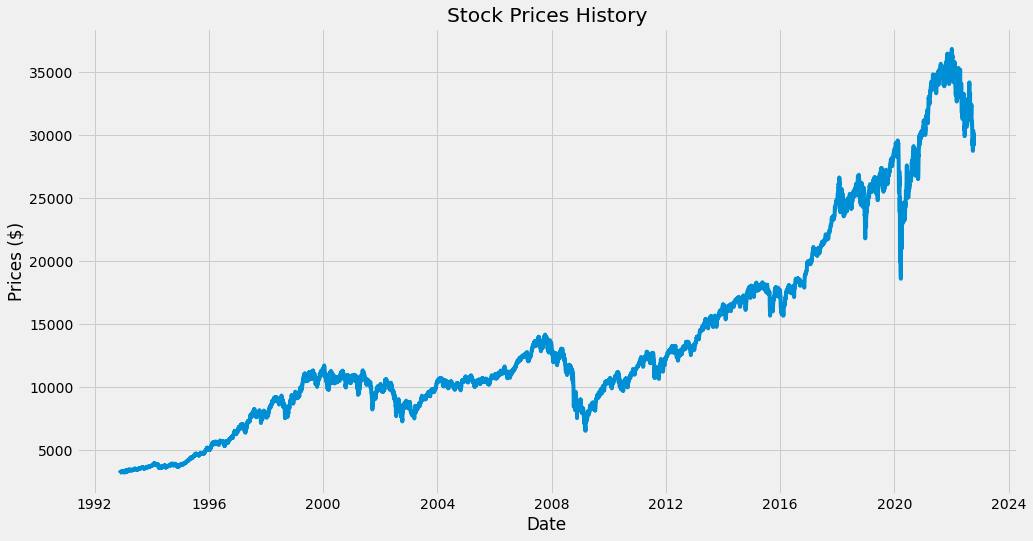

In [13]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close*'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [14]:
close_prices = df['Close*']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [17]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
5967/5967 [==============================] - 143s 23ms/step - loss: 2.0195e-04
Epoch 2/3
5967/5967 [==============================] - 126s 21ms/step - loss: 6.7546e-05
Epoch 3/3
5967/5967 [==============================] - 153s 26ms/step - loss: 4.7950e-05


In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

48/48 [==============================] - 3s 26ms/step


1801.385135084661

In [19]:
predictions

array([[17348.857],
       [17328.553],
       [17398.346],
       ...,
       [27270.803],
       [27279.092],
       [28051.299]], dtype=float32)

In [20]:
data = df.filter(['Close*'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions

In [21]:
validation

,Close*,Predictions
Date,,
2016-10-21,18145.71,17348.857422
2016-10-24,18223.03,17328.552734
2016-10-25,18169.27,17398.345703
2016-10-26,18199.33,17348.396484
2016-10-27,18169.68,17374.740234
...,...,...
2022-10-10,29202.88,27264.666016
2022-10-11,29239.19,27198.208984
2022-10-12,29210.85,27270.802734


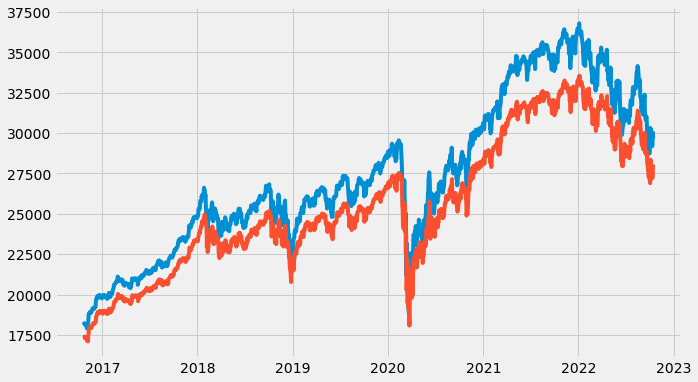

In [23]:
plt.plot(validation[['Close*']])
plt.plot(validation[[ 'Predictions']])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import datetime as dt

In [64]:
close_prices = df['Close*']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [69]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [75]:
x_train.size

356580

In [68]:
svr = SVR(kernel='rbf', gamma=0.1)
# Train the model 
svr.fit(x_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.